# Dimensionality Reduction

Dimensionality Reduction is exactly what it sounds like. These are techniques for reducing the dimensions.

## Why do we want to reduce the dimensions?

1. Remove multicolinearity
2. Deal with the *curse of dimensionality*
3. Remove redundant features
4. Interpretation & visualization
5. Make computations of algorithms easier
6. Discover hidden topics

## Standardize your dataset
We will always start by standardizing the dataset. This means:

1. Center the data for each feature at the mean (so we have mean 0)
2. Divide by the standard deviation (so we have std 1)

## Covariance Matrix
Recall that the covariance matrix is given by:

$\frac{1}{n}M^T M$

Note that this is only true because the data is centered around the mean.

## Example
This is our feature matrix:

$\begin{bmatrix}
 10 & 3 \\
 10 & 4 \\
 40 & 7 \\
 60 & 6 \\
 70 & 9 \\
100 & 7 \\
100 & 8
\end{bmatrix}$

This is the feature matrix after we standardize it:

$\begin{bmatrix}
-1.306 & -1.660 \\
-1.306 & -1.155 \\
-0.449 &  0.361 \\
 0.122 & -0.144 \\
 0.408 &  1.371 \\
 1.266 &  0.361 \\
 1.266 &  0.866
\end{bmatrix}$

This is the covariance matrix:

$\begin{bmatrix}
1.0  & 0.801 \\
0.801 & 1.0
\end{bmatrix}$

This tells us that the *covariance* between feature 1 and feature 2 is 0.801. This intuitively makes sense, since we can tell the two features are correlated.

The variance of each feature is 1 (this is because we standardized our data first).

The computations are done below with Python.

Populating the interactive namespace from numpy and matplotlib
M:
[[-1.30639453 -1.65988202]
 [-1.30639453 -1.15470054]
 [-0.44907312  0.36084392]
 [ 0.12247449 -0.14433757]
 [ 0.40824829  1.37120689]
 [ 1.2655697   0.36084392]
 [ 1.2655697   0.8660254 ]]

covariance matrix:
[[ 1.          0.80138769]
 [ 0.80138769  1.        ]]


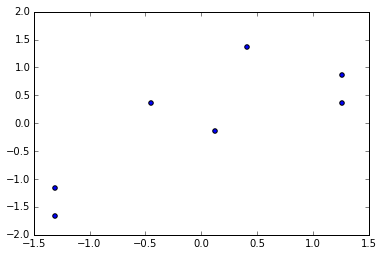

In [1]:
%pylab inline
import numpy as np
from sklearn.preprocessing import StandardScaler

data = np.array([[10., 3.], [10., 4.], [40., 7.], [60., 6.], [70., 9.], [100., 7.], [100., 8.]])
M = StandardScaler().fit_transform(data)
print "M:"
print M
print
print "covariance matrix:"
print 1/7. * M.T.dot(M)
plt.scatter(M[:,0], M[:,1]);

# Principal Components Analysis (PCA)

Usually we will get a covariance matrix with a lot of large values. Our ideal would be one where all the non-diagonal values are 0. This means that there is *no relationship between the features*. We can do a transformation of this data to make this happen!

The ideal convariance matrix would look something like this:

$\begin{bmatrix}
10 & 0 & 0 \\
0  & 8 & 0 \\
0  & 0 & 2
\end{bmatrix}$

The idea is to find a new set of axis (a *basis*) that better fit the data.

We choose the first principal component to be in the direction of the most variance. Here's a look at what we're doing:

<img src="files/correlated_2d.png" align="left">
<br clear="all">

The green line here is the direction with the most variance. This is our first axis.

Note that we choose the second dimension (the pink line) to be orthogonal (perpendicular) to the first. There is no covariance between the two features after we rotate the data:

<img src="files/uncorrelated_2d.png" align="left">
<br clear="all">

## PCA Mathematically

Our goal is to find a transformation matrix $V$ which when applied to $M$ gives us our ideal convariance matrix:

$(MV)^T (MV) = V^TM^TMV =
\begin{bmatrix}
\lambda_1 & 0 & 0 & \ldots & 0 \\
0 & \lambda_2 & 0 & \ldots & 0 \\
0 & 0 & \lambda_3 & \ldots & 0 \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
0 & 0 & 0 & \ldots & \lambda_p
\end{bmatrix}$

$V$ is the new basis so it should look like this:

$V =
\begin{bmatrix}
\mid & \mid & \mid & \cdots & \mid \\
u_1 & u_2 & u_3 & \cdots & u_p \\
\mid & \mid & \mid & \cdots & \mid
\end{bmatrix}$

Note that the $u_1, u_2, \ldots, u_p$ is an *orthonormal* basis.

*orthonormal* means:
1. Vectors are normal (perpendicular) with each other. This means their dot products are 0.
2. Vectors have norm 1. This means the dot product with itself is 1.

So the following is true:

$\begin{align*}
V^TV 
&=
\begin{bmatrix}
- & u_1 & - \\
- & u_2 & - \\
- & u_3 & - \\
- & \vdots & - \\
- & u_p & -
\end{bmatrix}
\begin{bmatrix}
\mid & \mid & \mid & \cdots & \mid \\
u_1 & u_2 & u_3 & \cdots & u_p \\
\mid & \mid & \mid & \cdots & \mid
\end{bmatrix} \\
&=
\begin{bmatrix}
u_1 \cdot u_1 & u_1 \cdot u_2 & \cdots & u_1 \cdot u_p \\
u_2 \cdot u_1 & u_2 \cdot u_2 & \cdots & u_2 \cdot u_p \\
\vdots & \vdots & \ddots & \vdots \\
u_p \cdot u_1 & u_p \cdot u_2 & \cdots & u_p \cdot u_p
\end{bmatrix} \\
&=
\begin{bmatrix}
1 & 0 & 0 & \cdots & 0 \\
0 & 1 & 0 & \cdots & 0 \\
0 & 0 & 1 & \cdots & 0 \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
0 & 0 & 0 & \cdots & 1
\end{bmatrix}
\end{align*}$

So $V^TV$ is the identity matrix!

Back to the original equation of our ideal world:

$\begin{align*}
V^TM^TMV &=
\begin{bmatrix}
\lambda_1 & 0 & 0 & \ldots & 0 \\
0 & \lambda_2 & 0 & \ldots & 0 \\
0 & 0 & \lambda_3 & \ldots & 0 \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
0 & 0 & 0 & \ldots & \lambda_p
\end{bmatrix}
\\
M^TMV &= V
\begin{bmatrix}
\lambda_1 & 0 & 0 & \ldots & 0 \\
0 & \lambda_2 & 0 & \ldots & 0 \\
0 & 0 & \lambda_3 & \ldots & 0 \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
0 & 0 & 0 & \ldots & \lambda_p
\end{bmatrix} \\
&=
\begin{bmatrix}
\mid & \mid & \mid & \cdots & \mid \\
u_1 & u_2 & u_3 & \cdots & u_p \\
\mid & \mid & \mid & \cdots & \mid
\end{bmatrix}
\begin{bmatrix}
\lambda_1 & 0 & 0 & \ldots & 0 \\
0 & \lambda_2 & 0 & \ldots & 0 \\
0 & 0 & \lambda_3 & \ldots & 0 \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
0 & 0 & 0 & \ldots & \lambda_p
\end{bmatrix}
\end{align*}$

Taking just one of these vectors out, we get:

$M^TMu_i = \lambda_iu_i$

So we are looking for the ***eigenvalues*** ($\lambda_i$) and ***eigenvectors*** ($u_i$).

## Summary of PCA

To get the transformation, we need to find the eigenvalues and eigenvectors of $M^TM$.

The eigenvectors are the new basis. The eigenvalues are the variance in each of these dimensions.

If we would like to reduce the number of dimensions, we can just get rid of the smallest of the lambdas. To determine how many to keep, we often look at the *scree plot*, a plot of the variances (eigenvalues, also called *loadings*) in increasing order.

### Example (MNIST)

The MNIST dataset has digits stored as $28 \times 28$ pixel images. This means there are 784 features. We can use PCA to reduce the dimensions. This is the scree plot:

<img src="files/screeplot.png" align="left">
<br clear="all">

You are generally looking for the elbow in the graph. Here it's around 25 that you stop gaining value from adding more features. You might even be able to get by with just 1 feature!

We can get a visual understanding of how much information is kept with each principal component by looking at the visual representation of the first eigenvector. We also here look at the first 10, 50 and 250 eigenvectors.

<img src="files/mnist_three.png" align="left">
<br clear="all">

We also often talk about keeping 80-90% of the variance.

# Singular Value Decomposition (SVD)

It's not always easy to directly compute the eigenvalues and eigenvectors. We can use a technique called SVD for more efficient computation. SVD is also useful for discovering hidden topics or ***latent features***.

Every matrix has a *unique* decomposition in the following form:

$M = U \Sigma V^T$

where
* $U$ is column orthogonal: $U^T U = I$
* $V$ is column orthogonal: $V^T V = I$
* $\Sigma$ is a diagonal matrix of positive values, where the diagonal is ordered in decreasing order

We can reduce the dimensions by sending the smaller of the diagonals to 0.

## Relationship between PCA and SVD

In PCA, we have the following:

$M^TMV = V\Lambda$

where $\Lambda$ is the diagonal matrix of eigenvalues.

As $M = U \Sigma V$ according to SVD:

$M^TM = (U \Sigma V^T)^T U \Sigma V^T = V \Sigma^T U^T U \Sigma V^T = V \Sigma^2 V^T$

So $M^TMV = V \Sigma^2$.

This looks like the same form as PCA, with $\Lambda = \Sigma^2$.


## SVD for topic analysis

We can use SVD to determine what we call ***latent features***. This will be best demonstrated with an example.

### Example

Let's look at users ratings of different movies. The ratings are from 1-5. A rating of 0 means the user hasn't watched the movie.

|       | Matrix | Alien | Serenity | Casablanca | Amelie |
| ----- | ------ | ----- | -------- | ---------- | ------ |
| **Alice** |      1 |     1 |        1 |          0 |      0 |
|   **Bob** |      3 |     3 |        3 |          0 |      0 |
| **Cindy** |      4 |     4 |        4 |          0 |      0 |
|   **Dan** |      5 |     5 |        5 |          0 |      0 |
| **Emily** |      0 |     2 |        0 |          4 |      4 |
| **Frank** |      0 |     0 |        0 |          5 |      5 |
|  **Greg** |      0 |     1 |        0 |          2 |      2 |

Note that the first three movies (Matrix, Alien, Serenity) are Sci-fi movies and the last two (Casablanca, Amelie) are Romance. We will be able to mathematically pull out these topics!

Let's do the computation with Python.

In [2]:
from numpy.linalg import svd

M = np.array([[1, 1, 1, 0, 0],
              [3, 3, 3, 0, 0],
              [4, 4, 4, 0, 0],
              [5, 5, 5, 0, 0],
              [0, 2, 0, 4, 4],
              [0, 0, 0, 5, 5],
              [0, 1, 0, 2, 2]])

u, e, v = svd(M)
print M
print "="
print np.around(u, 2)
print np.around(e, 2)
print np.around(v, 2)

[[1 1 1 0 0]
 [3 3 3 0 0]
 [4 4 4 0 0]
 [5 5 5 0 0]
 [0 2 0 4 4]
 [0 0 0 5 5]
 [0 1 0 2 2]]
=
[[-0.14 -0.02 -0.01  0.56 -0.38 -0.7  -0.19]
 [-0.41 -0.07 -0.03  0.21  0.76 -0.26  0.38]
 [-0.55 -0.09 -0.04 -0.72 -0.18 -0.34 -0.09]
 [-0.69 -0.12 -0.05  0.34 -0.23  0.57 -0.12]
 [-0.15  0.59  0.65  0.    0.2   0.   -0.4 ]
 [-0.07  0.73 -0.68  0.    0.    0.    0.  ]
 [-0.08  0.3   0.33  0.   -0.4   0.    0.8 ]]
[ 12.48   9.51   1.35   0.     0.  ]
[[-0.56 -0.59 -0.56 -0.09 -0.09]
 [-0.13  0.03 -0.13  0.7   0.7 ]
 [-0.41  0.8  -0.41 -0.09 -0.09]
 [-0.71  0.    0.71  0.    0.  ]
 [ 0.   -0.    0.   -0.71  0.71]]


Here's the results we get:

$
\begin{bmatrix}
1 & 1 & 1 & 0 & 0 \\
3 & 3 & 3 & 0 & 0 \\
4 & 4 & 4 & 0 & 0 \\
5 & 5 & 5 & 0 & 0 \\
0 & 2 & 0 & 4 & 4 \\
0 & 0 & 0 & 5 & 5 \\
0 & 1 & 0 & 2 & 2
\end{bmatrix}
=
\begin{bmatrix}
-0.14 & -0.02 & -0.01 & 0.56 & -0.38 \\
-0.41 & -0.07 & -0.03 & 0.21 & 0.76 \\
-0.55 & -0.09 & -0.04 & -0.72 & -0.18 \\
-0.69 & -0.12 & -0.05 & 0.34 & -0.23 \\
-0.15 & 0.59 & 0.65 & 0.0 & 0.2 \\
-0.07 & 0.73 & -0.68 & 0.0 & 0.0 \\
-0.08 & 0.3 & 0.33 & 0.0 & -0.4
\end{bmatrix}
\begin{bmatrix}
12.48 & 0.0 & 0.0 & 0.0 & 0.0 \\
0.0 & 9.51 & 0.0 & 0.0 & 0.0 \\
0.0 & 0.0 & 1.35 & 0.0 & 0.0 \\
0.0 & 0.0 & 0.0 & 0.0 & 0.0 \\
0.0 & 0.0 & 0.0 & 0.0 & 0.0
\end{bmatrix}
\begin{bmatrix}
-0.56 & -0.59 & -0.56 & -0.09 & -0.09 \\
-0.13 & 0.03 & -0.13 & 0.7 & 0.7 \\
-0.41 & 0.8 & -0.41 & -0.09 & -0.09 \\
-0.71 & 0.0 & 0.71 & 0.0 & 0.0 \\
0.0 & -0.0 & 0.0 & -0.71 & 0.71
\end{bmatrix}$

Note that the last two singular values are 0, so we can drop them. Note that these values are 0 because the rank of our original matrix is 3.

$\begin{bmatrix}
\textbf{1} & \textbf{1} & \textbf{1} & 0 & 0 \\
\textbf{3} & \textbf{3} & \textbf{3} & 0 & 0 \\
\textbf{4} & \textbf{4} & \textbf{4} & 0 & 0 \\
\textbf{5} & \textbf{5} & \textbf{5} & 0 & 0 \\
0 & \textbf{2} & 0 & \textbf{4} & \textbf{4} \\
0 & 0 & 0 & \textbf{5} & \textbf{5} \\
0 & \textbf{1} & 0 & \textbf{2} & \textbf{2}
\end{bmatrix}
=
\begin{bmatrix}
-0.14 & -0.02 & -0.01 \\
\textbf{-0.41} & -0.07 & -0.03 \\
\textbf{-0.55} & -0.09 & -0.04 \\
\textbf{-0.69} & -0.12 & -0.05 \\
-0.15 & \textbf{0.59} & \textbf{0.65} \\
-0.07 & \textbf{0.73} & \textbf{-0.68} \\
-0.08 & \textbf{0.3} & \textbf{0.33}
\end{bmatrix}
\begin{bmatrix}
\textbf{12.48} & 0.0 & 0.0 \\
0.0 & \textbf{9.51} & 0.0 \\
0.0 & 0.0 & \textbf{1.35}
\end{bmatrix}
\begin{bmatrix}
\textbf{-0.56} & \textbf{-0.59} & \textbf{-0.56} & -0.09 & -0.09 \\
-0.13 & 0.03 & -0.13 & \textbf{0.7} & \textbf{0.7} \\
\textbf{-0.41} & \textbf{0.8} & \textbf{-0.41} & -0.09 & -0.09
\end{bmatrix}$

You can see the two topics fall out:

1. Science Fiction
    * First singular value (12.4)
    * First column of the $U$ matrix (note that the first four users have large values here)
    * First row of the $V$ matrix (note that the first three movies have large values here)
2. Romance
    * Second singular value (9.5)
    * Second column of the $U$ matrix (note that the last three users have large values here)
    * Second row of the $V$ matrix (note that the last two movies have large values here)

$U$ is the ***user-to-topic*** matrix and $V$ is the ***movie-to-topic*** matrix.

The third singular value is relatively small, so we can exclude it with little loss of data. Let's try doing that and reconstruct our matrix!

$\begin{align*}
\begin{bmatrix}
1 & 1 & 1 & 0 & 0 \\
3 & 3 & 3 & 0 & 0 \\
4 & 4 & 4 & 0 & 0 \\
5 & 5 & 5 & 0 & 0 \\
0 & 2 & 0 & 4 & 4 \\
0 & 0 & 0 & 5 & 5 \\
0 & 1 & 0 & 2 & 2
\end{bmatrix}
&\approx
\begin{bmatrix}
-0.14 & -0.02 \\
-0.41 & -0.07 \\
-0.55 & -0.09 \\
-0.69 & -0.12 \\
-0.15 & 0.59 \\
-0.07 & 0.73 \\
-0.08 & 0.3
\end{bmatrix}
\begin{bmatrix}
12.48 & 0.0 \\
0.0 & 9.51
\end{bmatrix}
\begin{bmatrix}
-0.56 & -0.59 & -0.56 & -0.09 & -0.09 \\
-0.13 & 0.03 & -0.13 & 0.7 & 0.7
\end{bmatrix} \\
&=
\begin{bmatrix}
0.99 & 1.01 & 0.99 & -0.0 & -0.0 \\
2.98 & 3.04 & 2.98 & -0.0 & -0.0 \\
3.98 & 4.05 & 3.98 & -0.01 & -0.01 \\
4.97 & 5.06 & 4.97 & -0.01 & -0.01 \\
0.36 & 1.29 & 0.36 & 4.08 & 4.08 \\
-0.37 & 0.73 & -0.37 & 4.92 & 4.92 \\
0.18 & 0.65 & 0.18 & 2.04 & 2.04
\end{bmatrix}
\end{align*}$